<a href="https://colab.research.google.com/github/rychard-coder/-Trabalho_SAD-/blob/main/Trabalho_SAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install adjustText

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import datetime
import calendar
from matplotlib.ticker import PercentFormatter
import geopandas as gpd
import re
import adjustText as aT
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from catboost.utils import get_confusion_matrix
from catboost import cv
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Caminho do arquivo
file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

try:
    # Carregar CSV com delimitador correto, encoding e ignorando linhas problemáticas
    df = pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')

    # Exibindo número de linhas e colunas para verificação
    num_rows, num_cols = df.shape
    print("Número de linhas:", num_rows)
    print("Número de colunas:", num_cols)

    # Exibindo as primeiras linhas do DataFrame
    print(df.head())

    # Prossiga com o restante das análises ou manipulações no DataFrame
    # Exemplo: verificando informações básicas
    print("Informações gerais sobre o DataFrame:")
    print(df.info())

except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")


Número de linhas: 9546
Número de colunas: 8
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
Informações gerais 

In [ ]:
import os

# Obtendo o tamanho do arquivo em KB
file_size_kb = os.path.getsize(file_path) / 1024
print("Tamanho do arquivo (KB):", file_size_kb)

Tamanho do arquivo (KB): 1032.6767578125


In [ ]:
df.info()  # Exibe informações sobre cada coluna e tipo de dado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [ ]:
df.head()


,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [ ]:
df.dtypes


,0
Student ID,int64
Student Country,object
Question ID,int64
Type of Answer,int64
Question Level,object
Topic,object
Subtopic,object
Keywords,object


In [ ]:
df.describe()

,Student ID,Question ID,Type of Answer
count,9546.000000,9546.000000,9546.000000
mean,775.402263,478.912319,0.468259
std,460.590559,249.244061,0.499018
min,26.000000,77.000000,0.000000
25%,380.000000,323.000000,0.000000
50%,885.000000,428.000000,0.000000
75%,1219.000000,571.000000,1.000000
max,1565.000000,1549.000000,1.000000


In [ ]:

file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

try:
    # Carregando os dados no DataFrame goldprice
    MathE= pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')  # Ajuste o delimitador e encoding

    # Verificando valores nulos
    print("Valores nulos por coluna:")
    print(MathE.isnull().sum())  # Retorna a soma de valores nulos por coluna

    # Exibindo as 5 primeiras linhas para verificar o carregamento
    print("\nPrimeiras linhas do DataFrame:")
    print(MathE.head())
except Exception as e:
    print(f"Erro ao carregar os dados: {e}")



Valores nulos por coluna:
Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64

Primeiras linhas do DataFrame:
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative fre

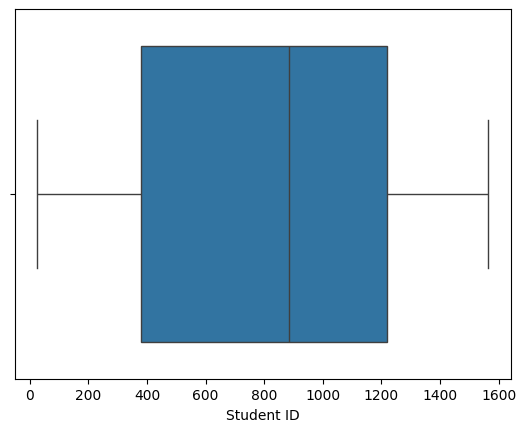

In [ ]:

sbn.boxplot(x=MathE['Student ID'])

# Exibir o gráfico
plt.show()


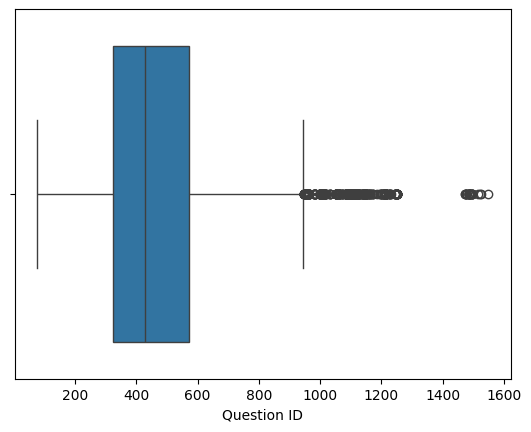

In [ ]:
sbn.boxplot(x=MathE['Question ID'])

# Exibir o gráfico
plt.show()

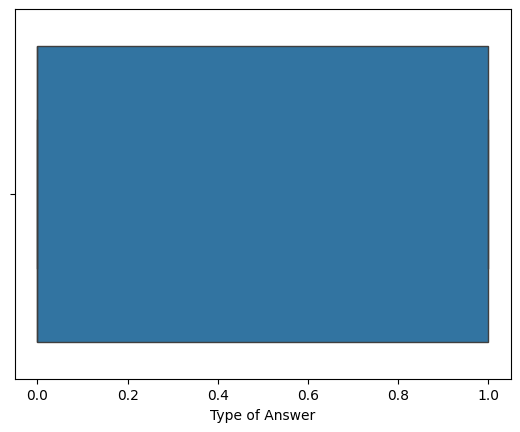

In [ ]:
sbn.boxplot(x=MathE['Type of Answer'])

# Exibir o gráfico
plt.show()

                Student ID  Question ID  Type of Answer
Student ID        1.000000     0.033439       -0.030064
Question ID       0.033439     1.000000       -0.013683
Type of Answer   -0.030064    -0.013683        1.000000


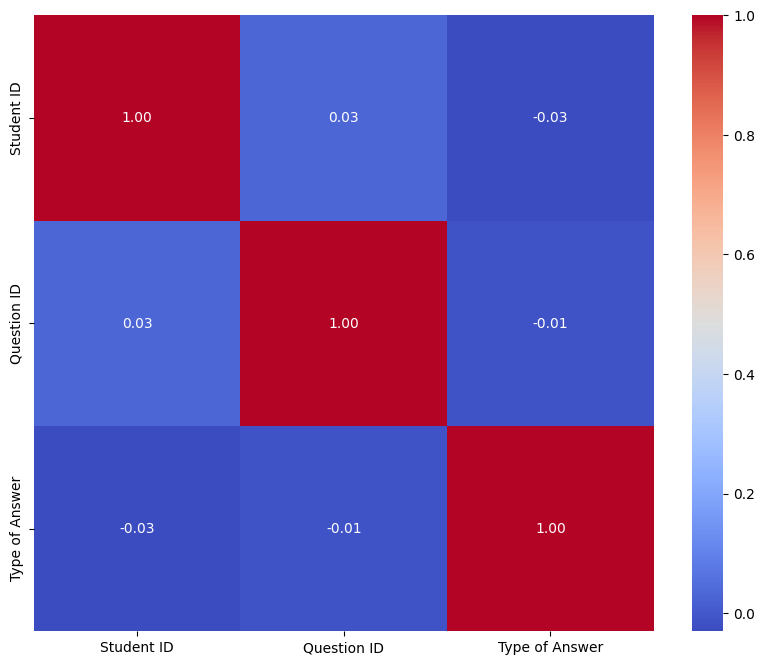

In [ ]:
# Selecionar apenas as colunas numéricas do DataFrame
df_numerico = df.select_dtypes(include=[np.number])

# Calcular a correlação
correlacao = df_numerico.corr()
print(correlacao)

# Criar o heatmap
plt.figure(figsize=(10,8))  # Ajustar tamanho do gráfico
sbn.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
# Exibindo os nomes das colunas no DataFrame
print(df.columns)


Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords'],
      dtype='object')


In [ ]:
# Remover espaços em branco no início e no fim dos nomes das colunas
df.columns = df.columns.str.strip()


In [ ]:
# Verificar as colunas após ajuste
print(df.columns)


Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords'],
      dtype='object')


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency  # Importando o teste Qui-quadrado

# Criando a tabela de contingência
contingencia = pd.crosstab(df['Student Country'], df['Question Level'])

# Executando o teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

# Resultados
print(f"Estatística Qui-quadrado: {chi2}")
print(f"P-valor: {p}")
print(f"Graus de liberdade: {dof}")
print("Frequências esperadas:\n", expected)

# Interpretação
if p < 0.05:
    print("Rejeitamos a hipótese nula: Existe associação entre as variáveis.")
else:
    print("Falhamos em rejeitar a hipótese nula: Não existe associação entre as variáveis.")



Estatística Qui-quadrado: 239.62929344463458
P-valor: 4.455934291548657e-48
Graus de liberdade: 7
Frequências esperadas:
 [[  53.48837209  246.51162791]
 [ 242.12403101 1115.87596899]
 [ 257.27906977 1185.72093023]
 [ 979.72868217 4515.27131783]
 [  10.69767442   49.30232558]
 [  19.07751938   87.92248062]
 [ 134.6124031   620.3875969 ]
 [   4.99224806   23.00775194]]
Rejeitamos a hipótese nula: Existe associação entre as variáveis.


In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Lista de variáveis a considerar
variaveis = ['Student Country', 'Question Level', 'Topic', 'Subtopic']

# Criando uma lista para armazenar os resultados
resultados = []

# Loop para analisar combinações de variáveis
for i in range(len(variaveis)):
    for j in range(i+1, len(variaveis)):
        # Gerando tabela de contingência
        contingencia = pd.crosstab(df[variaveis[i]], df[variaveis[j]])

        # Executando o teste Qui-quadrado
        chi2, p, dof, expected = chi2_contingency(contingencia)

        # Armazenando os resultados em uma lista
        resultados.append({
            'Variável 1': variaveis[i],
            'Variável 2': variaveis[j],
            'Qui-quadrado': round(chi2, 2),
            'P-valor': round(p, 4),
            'Graus de Liberdade': dof,
            'Associação': 'Sim' if p < 0.05 else 'Não'
        })

# Convertendo os resultados para um DataFrame
tabela_resultados = pd.DataFrame(resultados)

# Exibindo a tabela formatada
print(tabela_resultados)


        Variável 1      Variável 2  Qui-quadrado  P-valor  Graus de Liberdade  \
0  Student Country  Question Level        239.63      0.0                   7   
1  Student Country           Topic       4137.84      0.0                  91   
2  Student Country        Subtopic       5686.59      0.0                 161   
3   Question Level           Topic        672.81      0.0                  13   
4   Question Level        Subtopic        966.62      0.0                  23   
5            Topic        Subtopic     124098.00      0.0                 299   

  Associação  
0        Sim  
1        Sim  
2        Sim  
3        Sim  
4        Sim  
5        Sim  


Mounted at /content/drive
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   
5         697        Portugal           77               1          Basic   
6         720        Portugal           77               1          Basic   
7         675        Portugal           77               1          Basic   
8         663        Portugal           77               0          Basic   
9          28        Portugal           77               0          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagra

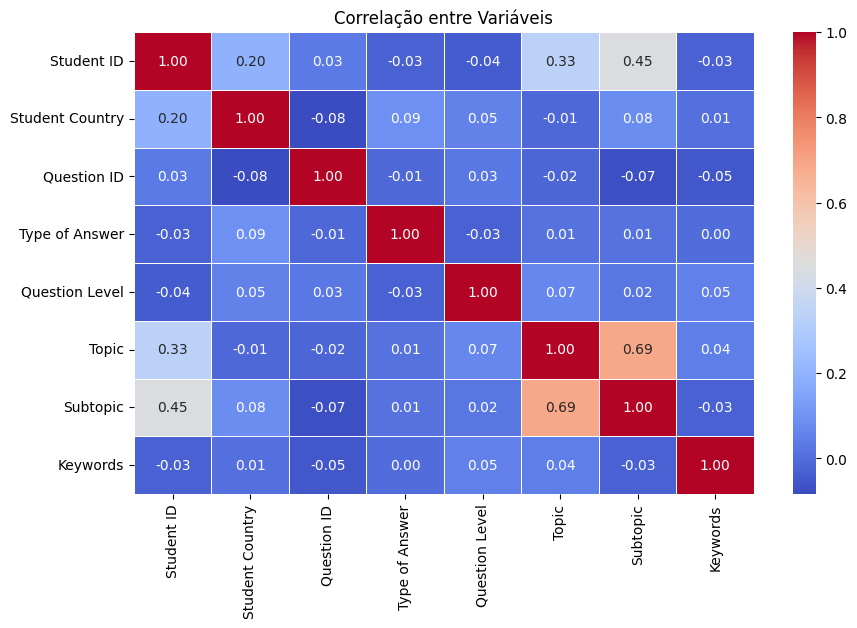

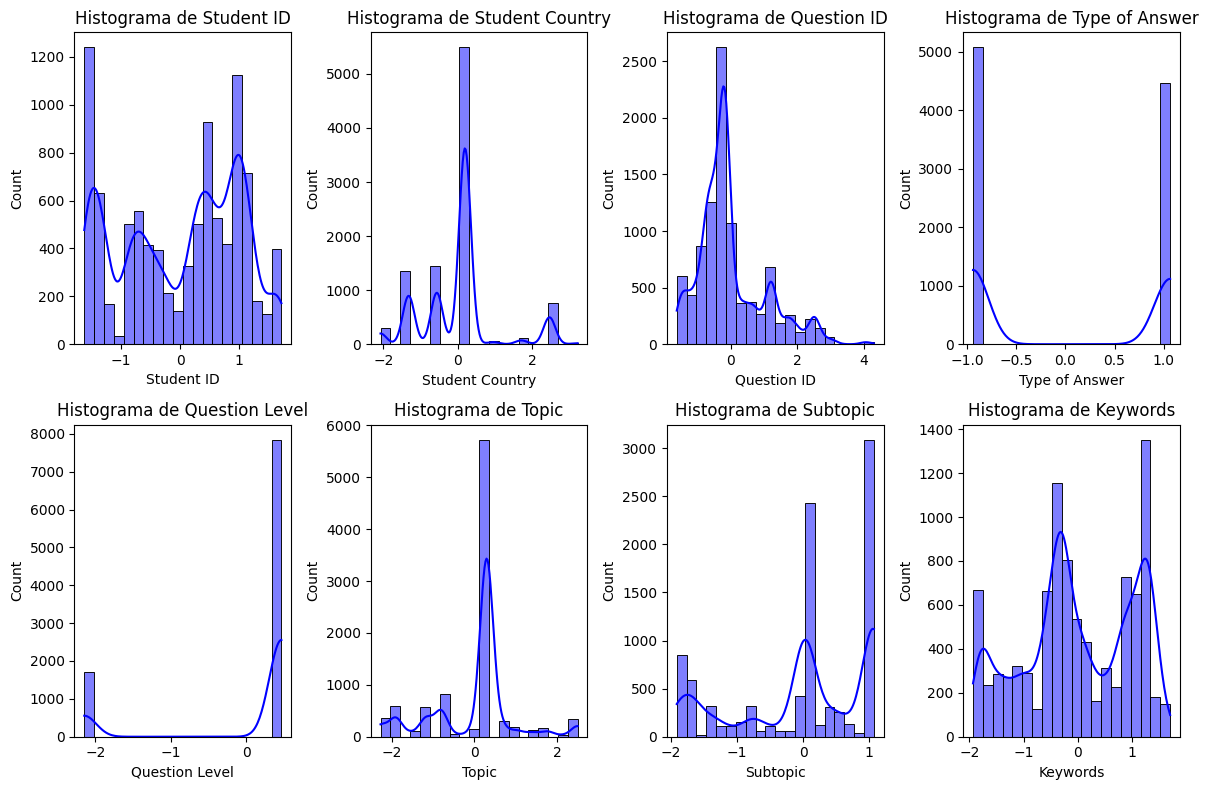

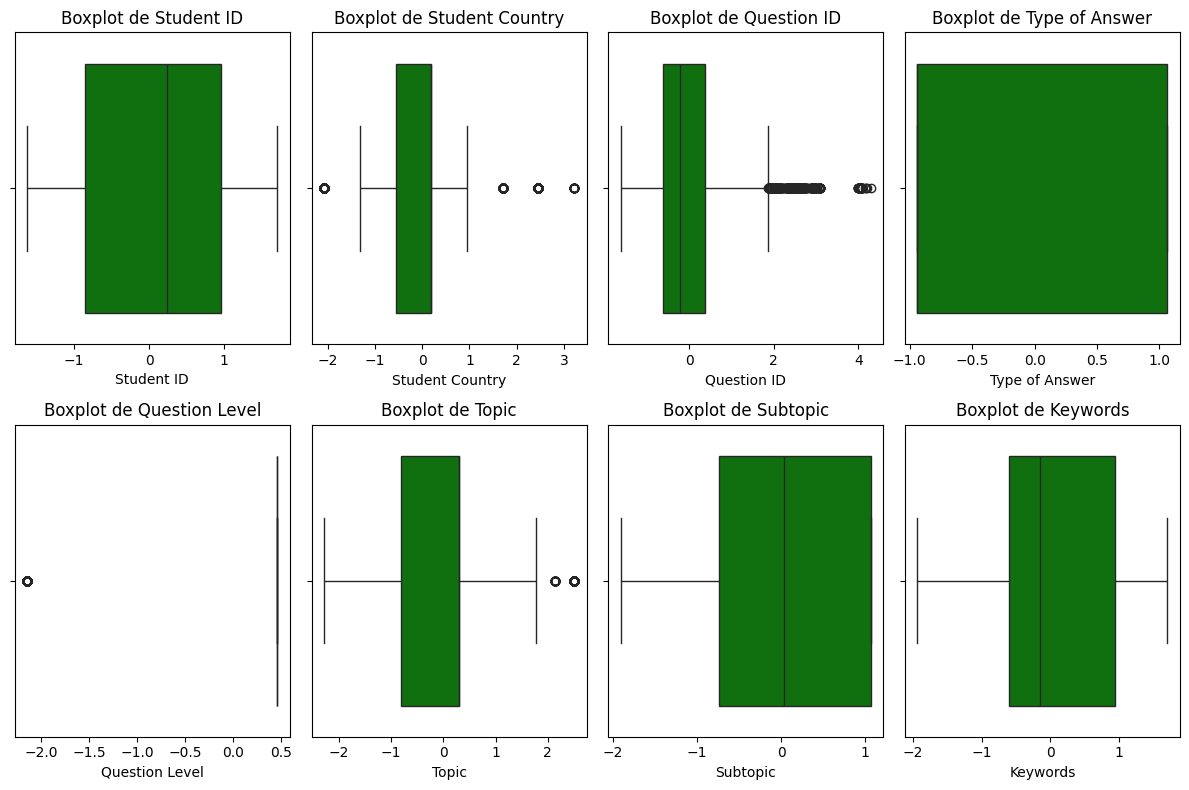

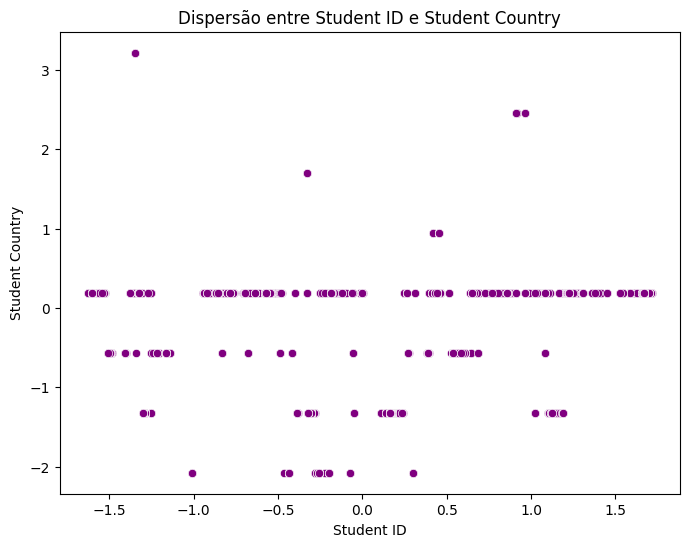

      Student ID  Student Country  Question ID  Type of Answer  \
9505    0.298758        -2.077533     3.097880       -0.938411   
8267    0.798143         0.190724     1.224116       -0.938411   
7742   -1.529426         0.190724     0.891092        1.065631   
7508   -0.576252         0.190724     0.674425        1.065631   
81      1.712234         0.190724    -1.584523        1.065631   

      Question Level     Topic  Subtopic  Keywords  
9505        0.465812  0.663147  0.421867  0.178394  
8267        0.465812  0.295186  0.033522 -0.332313  
7742        0.465812 -2.280542 -1.778757  0.358643  
7508        0.465812  0.295186  0.162970 -0.021883  
81          0.465812  1.767031 -0.354824 -0.562631  


In [13]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive
import os
from scipy import stats

# Montar o Google Drive
drive.mount('/content/drive', force_remount=True)

# Caminho para o arquivo CSV no Google Drive
file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

# Ler o arquivo CSV em um DataFrame
df = pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')

# Mostrar as primeiras 10 linhas do DataFrame
print(df.head(10))

# Obter o número de linhas e colunas do DataFrame
num_rows, num_cols = df.shape
print("Número de linhas:", num_rows)
print("Número de colunas:", num_cols)

# Obtendo o tamanho do arquivo em KB
file_size_kb = os.path.getsize(file_path) / 1024
print("Tamanho do arquivo (KB):", file_size_kb)

# Exibir informações sobre cada coluna e tipo de dado
df.info()

# Diagnóstico inicial do DataFrame
print("\n### Diagnóstico Inicial ###")
print(f"Colunas disponíveis: {df.columns.tolist()}")
print(f"Quantidade de linhas: {df.shape[0]}")
print(f"Quantidade de colunas: {df.shape[1]}")

# Verificar valores ausentes e tipos de dados para cada coluna
print("\n### Pré-processamento ###")
for coluna in df.columns:
    print(f"\nColuna: {coluna}")
    print(f" - Tipo de dado: {df[coluna].dtype}")
    print(f" - Valores ausentes: {df[coluna].isnull().sum()}")
    print(f" - Valores únicos: {df[coluna].nunique()}")

# Diagnóstico detalhado para todas as colunas
print("\n### Diagnóstico Geral das Colunas ###")
for coluna in df.columns:
    print(f"\nColuna: {coluna}")
    print(f" - Tipo de dado: {df[coluna].dtype}")
    print(f" - Valores ausentes: {df[coluna].isnull().sum()}")
    print(f" - Valores únicos: {df[coluna].nunique()}")

    if df[coluna].dtype in ['int64', 'float64']:
        print(f" - Estatísticas:\n{df[coluna].describe()}")
    elif df[coluna].dtype == 'object':
        print(f" - Categorias mais frequentes:\n{df[coluna].value_counts().head()}")

# Lidar com valores faltantes (exemplo usando a mediana para numéricos e modo para categóricos)
for coluna in df.columns:
    if df[coluna].dtype in ['int64', 'float64']:
        df[coluna] = df[coluna].fillna(df[coluna].median())
    elif df[coluna].dtype == 'object':
        df[coluna] = df[coluna].fillna(df[coluna].mode()[0])

# Converter variáveis categóricas para numéricas
label_encoders = {}
for coluna in df.select_dtypes(include=['object']).columns:
    # Garantir que todas as entradas sejam strings
    df[coluna] = df[coluna].astype(str)
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])
    label_encoders[coluna] = le

# Normalizar variáveis numéricas
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Dividir os dados em conjuntos de treino e teste
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Visualização de dados
# 1. Matriz de correlação
plt.figure(figsize=(10, 6))
sbn.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlação entre Variáveis')
plt.show()

# 2. Histograma de variáveis numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
for i, coluna in enumerate(numerical_columns):
    plt.subplot(2, len(numerical_columns) // 2, i + 1)
    sbn.histplot(df[coluna], kde=True, bins=20, color='blue', label=coluna)
    plt.title(f'Histograma de {coluna}')
plt.tight_layout()
plt.show()

# 3. Boxplot de variáveis numéricas
plt.figure(figsize=(12, 8))
for i, coluna in enumerate(numerical_columns):
    plt.subplot(2, len(numerical_columns) // 2, i + 1)
    sbn.boxplot(x=df[coluna], color='green')
    plt.title(f'Boxplot de {coluna}')
plt.tight_layout()
plt.show()

# 4. Gráfico de dispersão entre duas variáveis numéricas
plt.figure(figsize=(8, 6))
sbn.scatterplot(x=df[numerical_columns[0]], y=df[numerical_columns[1]], color='purple')
plt.title(f'Dispersão entre {numerical_columns[0]} e {numerical_columns[1]}')
plt.xlabel(numerical_columns[0])
plt.ylabel(numerical_columns[1])
plt.show()

# Exibir as primeiras linhas do conjunto de treino
print(train_df.head())


Mounted at /content/drive
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   
5         697        Portugal           77               1          Basic   
6         720        Portugal           77               1          Basic   
7         675        Portugal           77               1          Basic   
8         663        Portugal           77               0          Basic   
9          28        Portugal           77               0          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagra

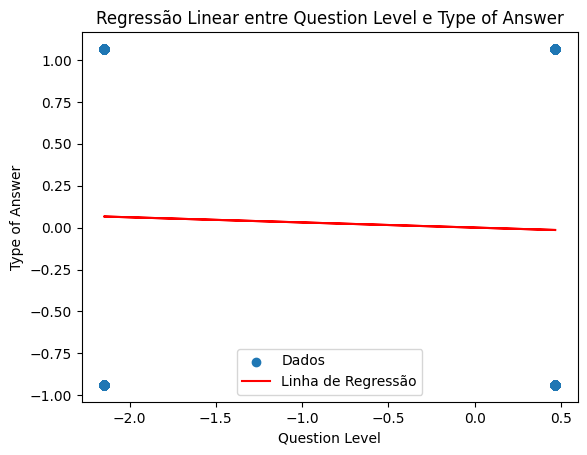

In [8]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive
import os

# Montar o Google Drive
drive.mount('/content/drive', force_remount=True)

# Caminho para o arquivo CSV no Google Drive
file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

# Ler o arquivo CSV em um DataFrame
df = pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')

# Diagnóstico inicial
print(df.head(10))
print("Número de linhas e colunas:", df.shape)
print("Tamanho do arquivo (KB):", os.path.getsize(file_path) / 1024)
df.info()

# Verificar se 'Question Level' e 'Type of Answer' estão no DataFrame
print("\nColunas disponíveis:", df.columns)

# Lidar com valores faltantes
for coluna in df.columns:
    if df[coluna].dtype in ['int64', 'float64']:
        df[coluna] = df[coluna].fillna(df[coluna].median())
    elif df[coluna].dtype == 'object':
        df[coluna] = df[coluna].fillna(df[coluna].mode()[0])

# Converter variáveis categóricas para numéricas
label_encoders = {}
for coluna in df.select_dtypes(include=['object']).columns:
    df[coluna] = df[coluna].astype(str)
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])
    label_encoders[coluna] = le

# Normalizar variáveis numéricas
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Selecionar as variáveis de interesse para a regressão
if 'Question Level' in df.columns and 'Type of Answer' in df.columns:
    X = df['Question Level']
    y = df['Type of Answer']

    # Converter os dados para numérico, se necessário
    X = pd.to_numeric(X, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')

    # Criar um DataFrame alinhado e remover valores NaN
    df_reg = pd.DataFrame({'Question Level': X, 'Type of Answer': y}).dropna()

    # Separar as variáveis após remoção de NaNs
    X = df_reg['Question Level']
    y = df_reg['Type of Answer']

    # Adicionar uma constante para o modelo
    X = sm.add_constant(X)

    # Ajustar o modelo de regressão linear
    model = sm.OLS(y, X).fit()

    # Exibir o resumo do modelo
    print(model.summary())

    # Plotar os dados e a linha de regressão
    plt.scatter(df_reg['Question Level'], df_reg['Type of Answer'], label='Dados')
    plt.plot(df_reg['Question Level'], model.predict(X), color='red', label='Linha de Regressão')
    plt.xlabel('Question Level')
    plt.ylabel('Type of Answer')
    plt.title('Regressão Linear entre Question Level e Type of Answer')
    plt.legend()
    plt.show()
else:
    print("As colunas 'Question Level' e 'Type of Answer' não foram encontradas no DataFrame.")





Mounted at /content/drive
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   
5         697        Portugal           77               1          Basic   
6         720        Portugal           77               1          Basic   
7         675        Portugal           77               1          Basic   
8         663        Portugal           77               0          Basic   
9          28        Portugal           77               0          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagra

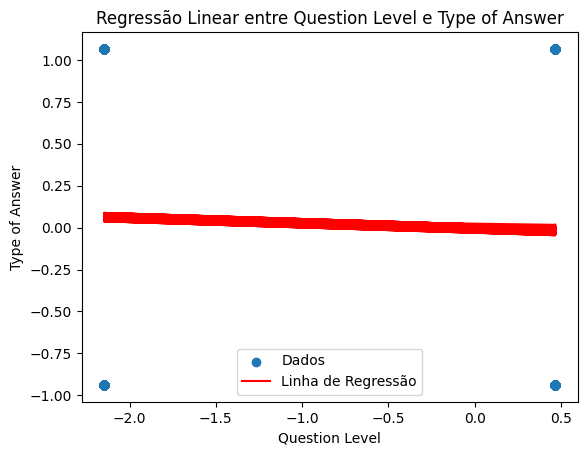


HIPÓTESES DE REGRESSÃO (PREVISÃO DO DESEMPENHO)
Hipótese: O nível da questão e o tópico abordado influenciam significativamente a taxa de acertos dos alunos.
Variável Dependente (Y): Percentual de acertos dos alunos, representado por Taxa de Acertos.
Variáveis Independentes (X):
- Question Level (Nível da questão: Básico ou Avançado)
- Topic (Tópico abordado na questão: Estatística, Álgebra, etc.)
- Subtopic (Subtópico específico: Gráficos, Limites, Derivadas, etc.)
Justificativa: A ideia central é que tanto o nível de complexidade das questões (básico ou avançado) quanto os tópicos abordados impactam diretamente a performance dos alunos.
A relação entre essas variáveis pode ser modelada por meio de uma regressão, permitindo prever a taxa de acertos com base nessas características.
Esse tipo de análise é importante para identificar quais fatores são mais determinantes para o desempenho dos alunos em questões específicas de matemática.

Modelo Sugerido: Regressão Linear ou Regressão Lo

In [9]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from google.colab import drive
import os

# Montar o Google Drive
drive.mount('/content/drive', force_remount=True)

# Caminho para o arquivo CSV no Google Drive
file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

# Ler o arquivo CSV em um DataFrame
df = pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')

# Diagnóstico inicial
print(df.head(10))
print("Número de linhas e colunas:", df.shape)
print("Tamanho do arquivo (KB):", os.path.getsize(file_path) / 1024)
df.info()

# Verificar se as colunas necessárias estão no DataFrame
print("\nColunas disponíveis:", df.columns)

# Lidar com valores faltantes
for coluna in df.columns:
    if df[coluna].dtype in ['int64', 'float64']:
        df[coluna] = df[coluna].fillna(df[coluna].median())
    elif df[coluna].dtype == 'object':
        df[coluna] = df[coluna].fillna(df[coluna].mode()[0])

# Converter variáveis categóricas para numéricas
label_encoders = {}
for coluna in df.select_dtypes(include=['object']).columns:
    df[coluna] = df[coluna].astype(str)
    le = LabelEncoder()
    df[coluna] = le.fit_transform(df[coluna])
    label_encoders[coluna] = le

# Normalizar variáveis numéricas
scaler = StandardScaler()
df[df.select_dtypes(include=['int64', 'float64']).columns] = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64']))

# Selecionar as variáveis de interesse para a regressão
if {'Question Level', 'Topic', 'Subtopic', 'Type of Answer'}.issubset(df.columns):
    X = df[['Question Level', 'Topic', 'Subtopic']]
    y = df['Type of Answer']

    # Converter os dados para numérico, se necessário
    X = X.apply(pd.to_numeric, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')

    # Criar um DataFrame alinhado e remover valores NaN
    df_reg = pd.concat([X, y], axis=1).dropna()
    X = df_reg[['Question Level', 'Topic', 'Subtopic']]
    y = df_reg['Type of Answer']

    # Adicionar uma constante para o modelo
    X = sm.add_constant(X)

    # Ajustar o modelo de regressão linear
    model = sm.OLS(y, X).fit()

    # Exibir o resumo do modelo
    print(model.summary())

    # Plotar os dados e a linha de regressão para Question Level
    plt.scatter(df_reg['Question Level'], df_reg['Type of Answer'], label='Dados')
    plt.plot(df_reg['Question Level'], model.predict(X), color='red', label='Linha de Regressão')
    plt.xlabel('Question Level')
    plt.ylabel('Type of Answer')
    plt.title('Regressão Linear entre Question Level e Type of Answer')
    plt.legend()
    plt.show()

    # Exibir a hipótese de regressão
    print("\nHIPÓTESES DE REGRESSÃO (PREVISÃO DO DESEMPENHO)")
    print("Hipótese: O nível da questão e o tópico abordado influenciam significativamente a taxa de acertos dos alunos.")
    print("Variável Dependente (Y): Percentual de acertos dos alunos, representado por Taxa de Acertos.")
    print("Variáveis Independentes (X):")
    print("- Question Level (Nível da questão: Básico ou Avançado)")
    print("- Topic (Tópico abordado na questão: Estatística, Álgebra, etc.)")
    print("- Subtopic (Subtópico específico: Gráficos, Limites, Derivadas, etc.)")
    print("Justificativa: A ideia central é que tanto o nível de complexidade das questões (básico ou avançado) quanto os tópicos abordados impactam diretamente a performance dos alunos.")
    print("A relação entre essas variáveis pode ser modelada por meio de uma regressão, permitindo prever a taxa de acertos com base nessas características.")
    print("Esse tipo de análise é importante para identificar quais fatores são mais determinantes para o desempenho dos alunos em questões específicas de matemática.")
    print("\nModelo Sugerido: Regressão Linear ou Regressão Logística")
    print("Objetivo do Modelo: Prever a taxa de acertos dos alunos com base nas variáveis explicativas, proporcionando insights sobre a relação entre a dificuldade da questão e o tema abordado.")
else:
    print("As colunas necessárias para a análise não foram encontradas no DataFrame.")


Mounted at /content/drive
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           77               0          Basic   
4         669        Portugal           77               1          Basic   

        Topic    Subtopic                                           Keywords  
0  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
1  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
2  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
3  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
4  Statistics  Statistics  Stem and Leaf diagram,Relative frequency,Sampl...  
<class 'pandas.core.frame.DataFrame'>

<ipython-input-12-c84b9d5e4507>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coluna].fillna(df[coluna].median(), inplace=True)
<ipython-input-12-c84b9d5e4507>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Acurácia do modelo: 0.5607
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.57      0.69      0.62      1002
           1       0.55      0.42      0.47       908

    accuracy                           0.56      1910
   macro avg       0.56      0.55      0.55      1910
weighted avg       0.56      0.56      0.55      1910

Matriz de Confusão:
[[692 310]
 [529 379]]


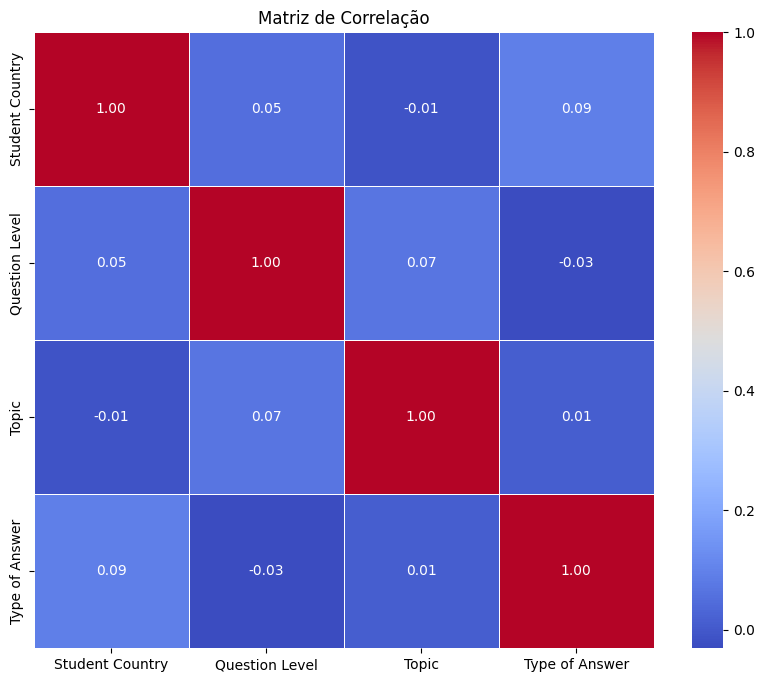

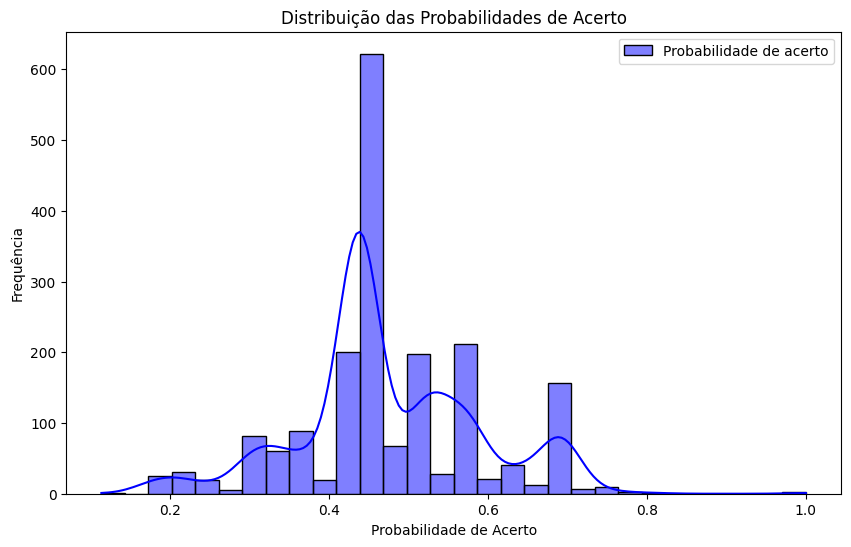

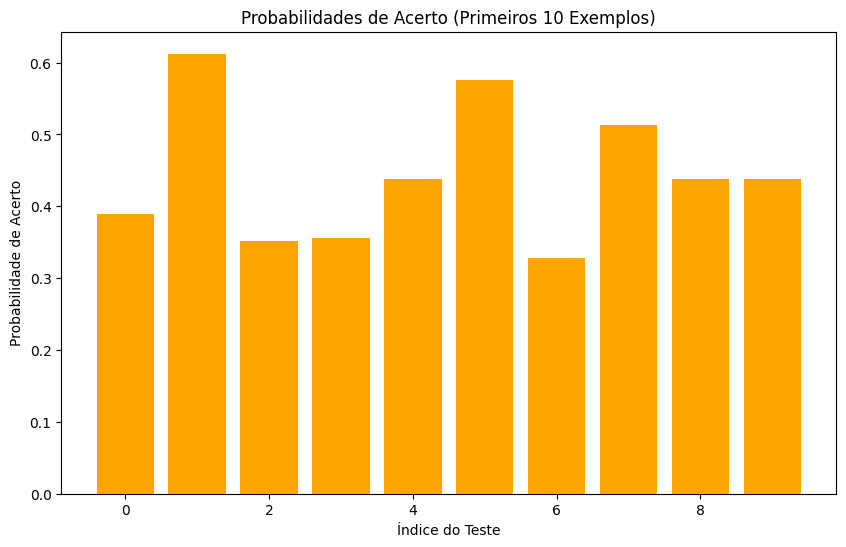

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive

# Montar o Google Drive
drive.mount('/content/drive', force_remount=True)

# Caminho do arquivo
file_path = '/content/drive/MyDrive/SAD/Base_SAD.csv'

# Carregar os dados
df = pd.read_csv(file_path, delimiter=';', encoding='latin1', on_bad_lines='skip')

# Diagnóstico inicial
print(df.head())
print(df.info())

# Verificar colunas disponíveis
print("Colunas disponíveis:", df.columns)

# Remover valores nulos preenchendo com a moda para categóricas e mediana para numéricas
for coluna in df.columns:
    if df[coluna].dtype == 'object':
        df[coluna].fillna(df[coluna].mode()[0], inplace=True)
    else:
        df[coluna].fillna(df[coluna].median(), inplace=True)

# Converter variáveis categóricas para numéricas
label_encoders = {}
categorical_columns = ['Student Country', 'Question Level', 'Topic']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Selecionar variáveis independentes (X) e alvo (Y)
X = df[['Student Country', 'Question Level', 'Topic']]
y = df['Type of Answer']  # 0 = Errado, 1 = Certo

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo: {accuracy:.4f}')
print('Relatório de Classificação:')
print(classification_report(y_test, y_pred))

# Exibir matriz de confusão
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

# Calcular a matriz de correlação
correlation_matrix = df[['Student Country', 'Question Level', 'Topic', 'Type of Answer']].apply(LabelEncoder().fit_transform).corr()

# Exibir a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

# Probabilidades de acerto para as previsões
y_prob = model.predict_proba(X_test)[:, 1]

# Plotar a distribuição das probabilidades de acerto
plt.figure(figsize=(10, 6))
sns.histplot(y_prob, kde=True, bins=30, color='blue', label='Probabilidade de acerto')
plt.title('Distribuição das Probabilidades de Acerto')
plt.xlabel('Probabilidade de Acerto')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# Gráfico de barras das primeiras 10 probabilidades de acerto (exemplo)
plt.figure(figsize=(10, 6))
plt.bar(range(10), y_prob[:10], color='orange')
plt.title('Probabilidades de Acerto (Primeiros 10 Exemplos)')
plt.xlabel('Índice do Teste')
plt.ylabel('Probabilidade de Acerto')
plt.show()


